In [17]:
# Authors: Elvis Dhomatob, <elvis.dohmatob@inria.fr>, Apr. 2014
#          Virgile Fritsch, <virgile.fritsch@inria.fr>, Apr 2014
#          Gael Varoquaux, Apr 2014
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.image import get_data
from pathlib import Path

from nilearn.mass_univariate import permuted_ols
from sklearn.feature_selection import VarianceThreshold

n_subjects = 100  # more subjects requires more memory

In [2]:
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects=n_subjects)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)

# print basic information on the dataset
print('First gray-matter anatomy image (3D) is located at: %s' %
      oasis_dataset.gray_matter_maps[0])  # 3D data
print('First white-matter anatomy image (3D) is located at: %s' %
      oasis_dataset.white_matter_maps[0])  # 3D data

First gray-matter anatomy image (3D) is located at: /home/raheppt1/nilearn_data/oasis1/OAS1_0001_MR1/mwrc1OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii.gz
First white-matter anatomy image (3D) is located at: /home/raheppt1/nilearn_data/oasis1/OAS1_0001_MR1/mwrc2OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii.gz


In [56]:
gray_matter_map_filenames = list(Path('/mnt/qdata/raheppt1/data/brainage/nako/interim/vbm/spm/test3/gm_data/').glob('*.nii'))
gray_matter_map_filenames = [str(f) for f in gray_matter_map_filenames][:1000]

import scipy.io
age = scipy.io.loadmat('/mnt/qdata/raheppt1/data/brainage/nako/interim/vbm/spm/test3/metadata.mat')['age']

In [57]:
age = age[0, :1000]
age.shape

(1000,)

In [58]:
nifti_masker = NiftiMasker(standardize=False, smoothing_fwhm=4, memory='nilearn_cache')  # cache options
gm_maps_masked = nifti_masker.fit_transform(gray_matter_map_filenames)
n_samples, n_features = gm_maps_masked.shape
print("%d samples, %d features" % (n_subjects, n_features)) 

KeyboardInterrupt: 

In [53]:
### Inference with massively univariate model ###
print("Massively univariate model")

# Remove features with too low between-subject variance
variance_threshold = VarianceThreshold(threshold=.01)

# Statistical inference
data = variance_threshold.fit_transform(gm_maps_masked)
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age, data,  # + intercept as a covariate by default
    n_perm=2000,  # 1,000 in the interest of time; 10000 would be better
    n_jobs=10)  # CPUs
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(signed_neg_log_pvals))


Massively univariate model


In [61]:
import nibabel as nib
signed_neg_log_pvals_unmasked = nib.load('/home/raheppt1/projects/brainage/notebooks/visualization/test.nii.gz')

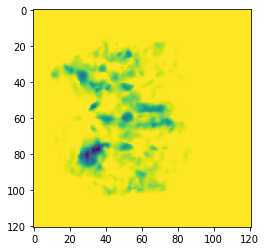

In [62]:
plt.imshow(signed_neg_log_pvals_unmasked.get_fdata()[:, :, :, 0].mean(axis=1) )

In [10]:
# Show results
threshold = -np.log10(0.20)  # 10% corrected

fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')

display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[z_slice],
                        figure=fig)
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)

n_detections = (get_data(signed_neg_log_pvals_unmasked) > threshold).sum()
print('\n%d detections' % n_detections)

show()

NameError: name 'plot_stat_map' is not defined

In [12]:
weight_img.shape

(91, 109, 91, 1)


1725 detections


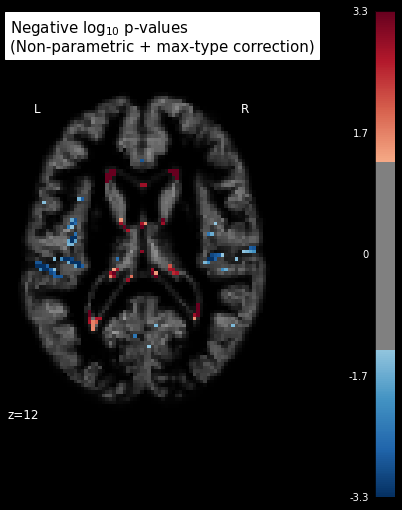

In [22]:
# Show results
threshold = -np.log10(0.05)  # 10% corrected

fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')

display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[12],
                        figure=fig)
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)

n_detections = (get_data(signed_neg_log_pvals_unmasked) > threshold).sum()
print('\n%d detections' % n_detections)

show()